In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
5.1            149 non-null float64
3.5            149 non-null float64
1.4            149 non-null float64
0.2            149 non-null float64
Iris-setosa    149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [2]:
df.columns = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm", "species"]
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length_cm    149 non-null float64
sepal_width_cm     149 non-null float64
petal_length_cm    149 non-null float64
petal_width_cm     149 non-null float64
species            149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [11]:
df.insert(0, 'id', df.index) # add a new column 'id' of indexes at location 0
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
id                 149 non-null int64
sepal_length_cm    149 non-null float64
sepal_width_cm     149 non-null float64
petal_length_cm    149 non-null float64
petal_width_cm     149 non-null float64
species            149 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [12]:
df.drop('id', axis=1, inplace=True) # drop the id column as it is unecessary, axis=1 specifies that it should be column wise, inplace=1 means the changes should be reflected into the dataframe
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length_cm    149 non-null float64
sepal_width_cm     149 non-null float64
petal_length_cm    149 non-null float64
petal_width_cm     149 non-null float64
species            149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


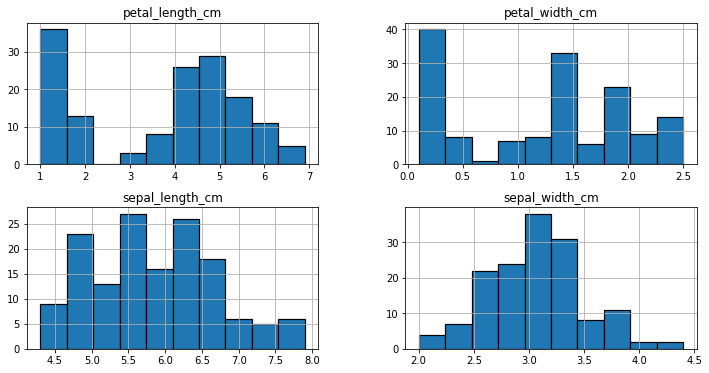

In [5]:
# Show how legnth and width are distributed

# only in jupyter matplotlib inline works 
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(edgecolor='black', linewidth=1.2)
# df.hist(bins=50, figsize=(20,15))
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

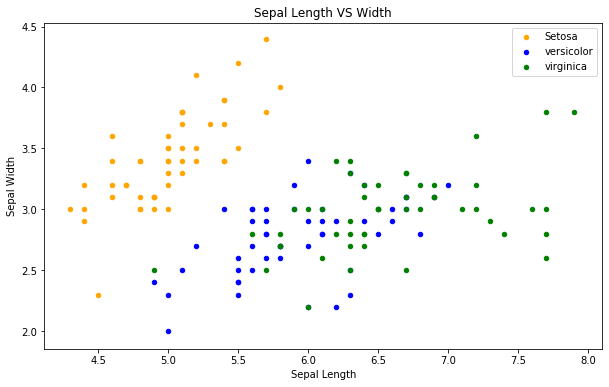

In [6]:
fig = df[df.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length_cm',y='sepal_width_cm',color='orange', label='Setosa')
df[df.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length_cm',y='sepal_width_cm',color='blue', label='versicolor',ax=fig)
df[df.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length_cm',y='sepal_width_cm',color='green', label='virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


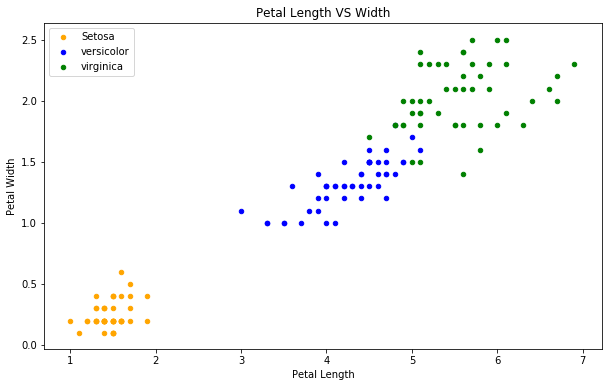

In [7]:
fig = df[df.species=='Iris-setosa'].plot(kind='scatter',x='petal_length_cm',y='petal_width_cm',color='orange', label='Setosa')
df[df.species=='Iris-versicolor'].plot(kind='scatter',x='petal_length_cm',y='petal_width_cm',color='blue', label='versicolor',ax=fig)
df[df.species=='Iris-virginica'].plot(kind='scatter',x='petal_length_cm',y='petal_width_cm',color='green', label='virginica', ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


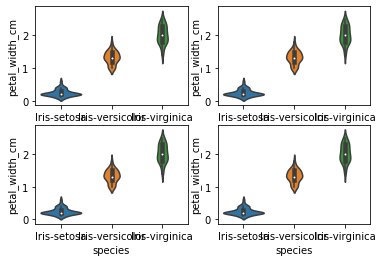

In [8]:
# Show how the length and width vary by species
import seaborn as sns

plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_width_cm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width_cm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_width_cm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width_cm',data=df)

In [9]:
# As the given problem is a classification rpoblem, use classification algorithms to build a model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier

In [10]:
df.shape

(149, 5)

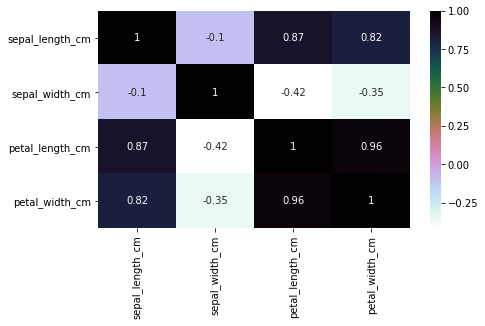

In [14]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

# Sepal legnth and width are uncorrelated
# Petal Length and Width are correlated

In [15]:
# Splitting the data into training and testing sets

train, test = train_test_split(df, test_size=0.3)
# test_size=0.3 splits the data into 70% (train examples) and 30% (test examples) ratio
print(train.shape)
print(test.shape)

(104, 5)
(45, 5)


In [17]:
# Check the training and testing datasets
train_X = train[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']]# taking the training data features
train_y = train.species   # output of our training data
test_X= test[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']] # taking test data features
test_y =test.species   # output value of test data

train_X.head(2)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,4.9,3.0,1.4,0.2
33,4.9,3.1,1.5,0.1


In [18]:
test_X.head(2)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
70,6.1,2.8,4.0,1.3
51,6.9,3.1,4.9,1.5


In [19]:
train_y.head() # output of the training data

0         Iris-setosa
33        Iris-setosa
13        Iris-setosa
106    Iris-virginica
21        Iris-setosa
Name: species, dtype: object

In [21]:
test_y.head()

70     Iris-versicolor
51     Iris-versicolor
23         Iris-setosa
109     Iris-virginica
119     Iris-virginica
Name: species, dtype: object

In [23]:
# Support Vector Machine SVM

model = svm.SVC()
model.fit(train_X, train_y) # train the algorithm with given input datasets
prediction = model.predict(test_X) # test the trained algorithm against the testing data 
print('The accuaracy of the SVM is:', metrics.accuracy_score(prediction, test_y)) # compare the actual output and predicted output

The accuaracy of the SVM is: 1.0


In [24]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 1.0


In [25]:
# Decision Tree

model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 1.0


In [26]:
# K-Nearest Neighbours

model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 1.0


([<matplotlib.axis.XTick at 0x7f96018ea6a0>,
 <a list of 10 Text xticklabel objects>)

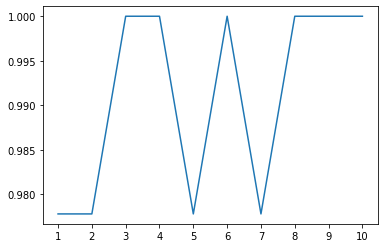

In [29]:
# Check the accuracy for various n values

a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x) 

In [31]:
# Creating Petals and Sepals Training Data

petal = df[['petal_length_cm','petal_width_cm','species']]
sepal = df[['sepal_length_cm','sepal_width_cm','species']]

In [32]:
petal.head(2)

,petal_length_cm,petal_width_cm,species
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa


In [33]:
sepal.head(2)

,sepal_length_cm,sepal_width_cm,species
0,4.9,3.0,Iris-setosa
1,4.7,3.2,Iris-setosa


In [34]:
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)  # petals
# random_state will return the same training and testing datasets whenever, the number doesn't matter
train_x_p = train_p[['petal_length_cm','petal_width_cm']]
train_y_p = train_p.species
test_x_p = test_p[['petal_length_cm','petal_width_cm']]
test_y_p = test_p.species


train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)  # Sepal
train_x_s = train_s[['sepal_length_cm','sepal_width_cm']]
train_y_s = train_s.species
test_x_s = test_s[['sepal_length_cm','sepal_width_cm']]
test_y_s = test_s.species

In [35]:
# SVM

model = svm.SVC()
model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model = svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the SVM using Petals is: 0.9333333333333333
The accuracy of the SVM using Sepal is: 0.8222222222222222


In [36]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9111111111111111
The accuracy of the Logistic Regression using Sepals is: 0.7777777777777778


In [37]:
# Decision Tree

model=DecisionTreeClassifier()
model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9111111111111111
The accuracy of the Decision Tree using Sepals is: 0.7555555555555555


In [38]:
# KNN

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9111111111111111
The accuracy of the KNN using Sepals is: 0.7111111111111111
